In [8]:
import sys
print(sys.version)

3.11.7 (v3.11.7:fa7a6f2303, Dec  4 2023, 15:22:56) [Clang 13.0.0 (clang-1300.0.29.30)]


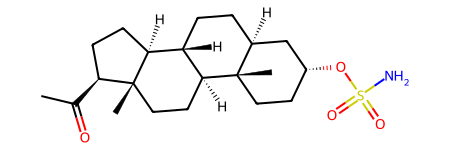

In [1]:
from rdkit.Chem.rdmolfiles import MolFromSmiles, MolFromSmarts
from rdkit.Chem.rdFMCS import FindMCS, RingCompare, AtomCompare, BondCompare

# VRI: https://www.rcsb.org/ligand/VRI
smiles = "CC(=O)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CC[C@@H]4[C@@]3(CC[C@H](C4)OS(=O)(=O)N)C)C"
mol = MolFromSmiles(smiles)
mol

In [2]:
import rdkit
rdkit.__version__

'2023.09.6'

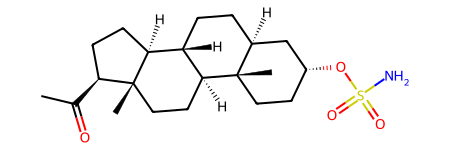

In [3]:
mol

Atoms matched: 27 of 27. Bonds matched: 30 of 30.


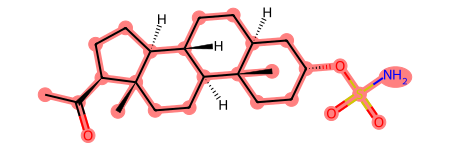

In [4]:
mcs = FindMCS([mol, mol])
print(f"Atoms matched: {mcs.numAtoms} of {mol.GetNumAtoms()}. Bonds matched: {mcs.numBonds} of {mol.GetNumBonds()}.")
mol.GetSubstructMatch(MolFromSmarts(mcs.smartsString))
mol

Atoms matched: 26 of 27. Bonds matched: 29 of 30.


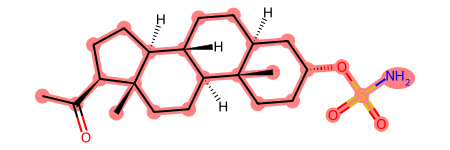

In [5]:
mcs = FindMCS([mol, mol], matchChiralTag=True)
print(f"Atoms matched: {mcs.numAtoms} of {mol.GetNumAtoms()}. Bonds matched: {mcs.numBonds} of {mol.GetNumBonds()}.")
mol.GetSubstructMatch(MolFromSmarts(mcs.smartsString))
mol

Atoms matched: 24 of 27. Bonds matched: 27 of 30.


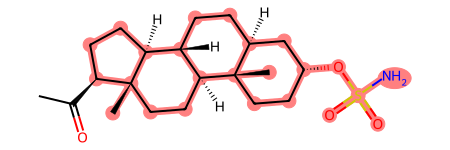

In [6]:
mcs = FindMCS([mol, mol], matchChiralTag=True, ringMatchesRingOnly=True)
mcs_smarts = mcs.smartsString
print(f"Atoms matched: {mcs.numAtoms} of {mol.GetNumAtoms()}. Bonds matched: {mcs.numBonds} of {mol.GetNumBonds()}.")
mol.GetSubstructMatch(MolFromSmarts(mcs.smartsString))
mol

Atoms matched: 23 of 27. Bonds matched: 24 of 30.


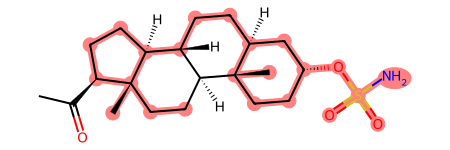

In [7]:
mcs = FindMCS([mol, mol], matchChiralTag=True, ringMatchesRingOnly=True, ringCompare=RingCompare.StrictRingFusion)
print(f"Atoms matched: {mcs.numAtoms} of {mol.GetNumAtoms()}. Bonds matched: {mcs.numBonds} of {mol.GetNumBonds()}.")
mol.GetSubstructMatch(MolFromSmarts(mcs.smartsString))
mol